In [ ]:
from moabb.datasets import BNCI2014_001, PhysionetMI
from moabb.paradigms import MotorImagery
from moabb.evaluations import WithinSessionEvaluation

from sklearn.pipeline import make_pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mne.decoding import CSP

import mne
import moabb

moabb.set_log_level('WARNING')
mne.set_log_level('WARNING')

## Prepare datasets

In [ ]:
#dataset = PhysionetMI()
datasets = [BNCI2014_001(), PhysionetMI()]

# Limit to first 3 subjects for faster execution
for dataset in datasets:
    dataset.subject_list = [1, 2, 3]
    print(f"Dataset: {dataset.__class__.__name__}")
    print(f"Paradigm: {dataset.paradigm}")
    print(f"Subjects: {dataset.subject_list}")
    print(f"Sessions per subject: {dataset.n_sessions}")
    print(f"Event types: {dataset.event_id}")

Dataset: BNCI2014_001
Paradigm: imagery
Subjects: [1, 2, 3]
Sessions per subject: 2
Event types: {'left_hand': 1, 'right_hand': 2, 'feet': 3, 'tongue': 4}
Dataset: PhysionetMI
Paradigm: imagery
Subjects: [1, 2, 3]
Sessions per subject: 1
Event types: {'left_hand': 2, 'right_hand': 3, 'feet': 5, 'hands': 4, 'rest': 1}


## Prepare pipelines

In [ ]:
paradigm = MotorImagery(n_classes=4)

svm = OneVsRestClassifier(SVC(kernel='rbf', probability=True))
csp = CSP(n_components=4, reg=None, log=True, norm_trace=False)

pipelines = {}
pipelines["CSP + SVM"] = make_pipeline(csp, svm)
pipelines['CSP + LDA'] = make_pipeline(
    CSP(n_components=8),
    LinearDiscriminantAnalysis()
)

evaluation = WithinSessionEvaluation(paradigm=paradigm, datasets=datasets)
results = evaluation.process(pipelines)


2025-10-21 20:24:24,653 WARNING MainThread moabb.paradigms.motor_imagery Choosing from all possible events
BNCI2014-001-WithinSession:   0%|          | 0/3 [00:00<?, ?it/s]d:\STUDIA\ZPB\.venv\Lib\site-packages\moabb\datasets\preprocessing.py:278: UserWarning: warnEpochs <Epochs | 48 events (all good), 2 – 6 s (baseline off), ~8.1 MiB, data loaded,
 'left_hand': 12
 'right_hand': 12
 'feet': 12
 'tongue': 12>
  warn(f"warnEpochs {epochs}")
d:\STUDIA\ZPB\.venv\Lib\site-packages\moabb\datasets\preprocessing.py:278: UserWarning: warnEpochs <Epochs | 48 events (all good), 2 – 6 s (baseline off), ~8.1 MiB, data loaded,
 'left_hand': 12
 'right_hand': 12
 'feet': 12
 'tongue': 12>
  warn(f"warnEpochs {epochs}")
d:\STUDIA\ZPB\.venv\Lib\site-packages\moabb\datasets\preprocessing.py:278: UserWarning: warnEpochs <Epochs | 48 events (all good), 2 – 6 s (baseline off), ~8.1 MiB, data loaded,
 'left_hand': 12
 'right_hand': 12
 'feet': 12
 'tongue': 12>
  warn(f"warnEpochs {epochs}")
d:\STUDIA\ZPB\.

No hdf5_path provided, models will not be saved.
No hdf5_path provided, models will not be saved.


BNCI2014-001-WithinSession:  33%|███▎      | 1/3 [00:09<00:19,  9.77s/it]d:\STUDIA\ZPB\.venv\Lib\site-packages\moabb\datasets\preprocessing.py:278: UserWarning: warnEpochs <Epochs | 48 events (all good), 2 – 6 s (baseline off), ~8.1 MiB, data loaded,
 'left_hand': 12
 'right_hand': 12
 'feet': 12
 'tongue': 12>
  warn(f"warnEpochs {epochs}")
d:\STUDIA\ZPB\.venv\Lib\site-packages\moabb\datasets\preprocessing.py:278: UserWarning: warnEpochs <Epochs | 48 events (all good), 2 – 6 s (baseline off), ~8.1 MiB, data loaded,
 'left_hand': 12
 'right_hand': 12
 'feet': 12
 'tongue': 12>
  warn(f"warnEpochs {epochs}")
d:\STUDIA\ZPB\.venv\Lib\site-packages\moabb\datasets\preprocessing.py:278: UserWarning: warnEpochs <Epochs | 48 events (all good), 2 – 6 s (baseline off), ~8.1 MiB, data loaded,
 'left_hand': 12
 'right_hand': 12
 'feet': 12
 'tongue': 12>
  warn(f"warnEpochs {epochs}")
d:\STUDIA\ZPB\.venv\Lib\site-packages\moabb\datasets\preprocessing.py:278: UserWarning: warnEpochs <Epochs | 48 ev

No hdf5_path provided, models will not be saved.
No hdf5_path provided, models will not be saved.
No hdf5_path provided, models will not be saved.
No hdf5_path provided, models will not be saved.


BNCI2014-001-WithinSession:  67%|██████▋   | 2/3 [00:26<00:13, 13.67s/it]d:\STUDIA\ZPB\.venv\Lib\site-packages\moabb\datasets\preprocessing.py:278: UserWarning: warnEpochs <Epochs | 48 events (all good), 2 – 6 s (baseline off), ~8.1 MiB, data loaded,
 'left_hand': 12
 'right_hand': 12
 'feet': 12
 'tongue': 12>
  warn(f"warnEpochs {epochs}")
d:\STUDIA\ZPB\.venv\Lib\site-packages\moabb\datasets\preprocessing.py:278: UserWarning: warnEpochs <Epochs | 48 events (all good), 2 – 6 s (baseline off), ~8.1 MiB, data loaded,
 'left_hand': 12
 'right_hand': 12
 'feet': 12
 'tongue': 12>
  warn(f"warnEpochs {epochs}")
d:\STUDIA\ZPB\.venv\Lib\site-packages\moabb\datasets\preprocessing.py:278: UserWarning: warnEpochs <Epochs | 48 events (all good), 2 – 6 s (baseline off), ~8.1 MiB, data loaded,
 'left_hand': 12
 'right_hand': 12
 'feet': 12
 'tongue': 12>
  warn(f"warnEpochs {epochs}")
d:\STUDIA\ZPB\.venv\Lib\site-packages\moabb\datasets\preprocessing.py:278: UserWarning: warnEpochs <Epochs | 48 ev

No hdf5_path provided, models will not be saved.
No hdf5_path provided, models will not be saved.
No hdf5_path provided, models will not be saved.
No hdf5_path provided, models will not be saved.


PhysionetMotorImagery-WithinSession:   0%|          | 0/3 [00:00<?, ?it/s]d:\STUDIA\ZPB\.venv\Lib\site-packages\moabb\datasets\preprocessing.py:278: UserWarning: warnEpochs <Epochs | 29 events (all good), 0 – 3 s (baseline off), ~6.9 MiB, data loaded,
 'left_hand': 8
 'right_hand': 7
 'feet': 0
 'hands': 0
 'rest': 14>
  warn(f"warnEpochs {epochs}")
d:\STUDIA\ZPB\.venv\Lib\site-packages\moabb\datasets\preprocessing.py:278: UserWarning: warnEpochs <Epochs | 29 events (all good), 0 – 3 s (baseline off), ~6.9 MiB, data loaded,
 'left_hand': 8
 'right_hand': 7
 'feet': 0
 'hands': 0
 'rest': 14>
  warn(f"warnEpochs {epochs}")
d:\STUDIA\ZPB\.venv\Lib\site-packages\moabb\datasets\preprocessing.py:278: UserWarning: warnEpochs <Epochs | 29 events (all good), 0 – 3 s (baseline off), ~6.9 MiB, data loaded,
 'left_hand': 7
 'right_hand': 8
 'feet': 0
 'hands': 0
 'rest': 14>
  warn(f"warnEpochs {epochs}")
d:\STUDIA\ZPB\.venv\Lib\site-packages\moabb\datasets\preprocessing.py:278: UserWarning: warn

No hdf5_path provided, models will not be saved.
No hdf5_path provided, models will not be saved.


PhysionetMotorImagery-WithinSession:  33%|███▎      | 1/3 [00:38<01:16, 38.41s/it]d:\STUDIA\ZPB\.venv\Lib\site-packages\moabb\datasets\preprocessing.py:278: UserWarning: warnEpochs <Epochs | 29 events (all good), 0 – 3 s (baseline off), ~6.9 MiB, data loaded,
 'left_hand': 7
 'right_hand': 8
 'feet': 0
 'hands': 0
 'rest': 14>
  warn(f"warnEpochs {epochs}")
d:\STUDIA\ZPB\.venv\Lib\site-packages\moabb\datasets\preprocessing.py:278: UserWarning: warnEpochs <Epochs | 29 events (all good), 0 – 3 s (baseline off), ~6.9 MiB, data loaded,
 'left_hand': 8
 'right_hand': 7
 'feet': 0
 'hands': 0
 'rest': 14>
  warn(f"warnEpochs {epochs}")
d:\STUDIA\ZPB\.venv\Lib\site-packages\moabb\datasets\preprocessing.py:278: UserWarning: warnEpochs <Epochs | 29 events (all good), 0 – 3 s (baseline off), ~6.9 MiB, data loaded,
 'left_hand': 8
 'right_hand': 7
 'feet': 0
 'hands': 0
 'rest': 14>
  warn(f"warnEpochs {epochs}")
d:\STUDIA\ZPB\.venv\Lib\site-packages\moabb\datasets\preprocessing.py:278: UserWarni

No hdf5_path provided, models will not be saved.
No hdf5_path provided, models will not be saved.


PhysionetMotorImagery-WithinSession:  67%|██████▋   | 2/3 [01:09<00:34, 34.21s/it]d:\STUDIA\ZPB\.venv\Lib\site-packages\moabb\datasets\preprocessing.py:278: UserWarning: warnEpochs <Epochs | 29 events (all good), 0 – 3 s (baseline off), ~6.9 MiB, data loaded,
 'left_hand': 8
 'right_hand': 7
 'feet': 0
 'hands': 0
 'rest': 14>
  warn(f"warnEpochs {epochs}")
d:\STUDIA\ZPB\.venv\Lib\site-packages\moabb\datasets\preprocessing.py:278: UserWarning: warnEpochs <Epochs | 29 events (all good), 0 – 3 s (baseline off), ~6.9 MiB, data loaded,
 'left_hand': 7
 'right_hand': 8
 'feet': 0
 'hands': 0
 'rest': 14>
  warn(f"warnEpochs {epochs}")
d:\STUDIA\ZPB\.venv\Lib\site-packages\moabb\datasets\preprocessing.py:278: UserWarning: warnEpochs <Epochs | 29 events (all good), 0 – 3 s (baseline off), ~6.9 MiB, data loaded,
 'left_hand': 8
 'right_hand': 7
 'feet': 0
 'hands': 0
 'rest': 14>
  warn(f"warnEpochs {epochs}")
d:\STUDIA\ZPB\.venv\Lib\site-packages\moabb\datasets\preprocessing.py:278: UserWarni

No hdf5_path provided, models will not be saved.
No hdf5_path provided, models will not be saved.


PhysionetMotorImagery-WithinSession: 100%|██████████| 3/3 [01:42<00:00, 34.30s/it]


## Print results

In [36]:
print("Results Summary:")
summary = results.groupby(['pipeline', 'dataset'])['score'].agg(['mean', 'std', 'count'])
summary['mean'] = summary['mean'].round(3)
summary['std'] = summary['std'].round(3)
print(summary)
print("=" * 50)

# Overall summary across all datasets
print("\nOverall Summary by Pipeline:")
overall_summary = results.groupby(['pipeline'])['score'].agg(['mean', 'std', 'count'])
overall_summary['mean'] = overall_summary['mean'].round(3)
overall_summary['std'] = overall_summary['std'].round(3)
print(overall_summary)
print("=" * 50)

# Detailed results by subject and dataset
print("\nDetailed Results by Subject and Dataset:")
detailed = results.pivot_table(
    index=['dataset', 'subject', 'session'], 
    columns='pipeline', 
    values='score'
)
print(detailed.round(3))
print("=" * 50)

Results Summary:
                                  mean    std  count
pipeline  dataset                                   
CSP + SVM BNCI2014-001           0.694  0.117      6
          PhysionetMotorImagery  0.454  0.030      3
CSP+LDA   BNCI2014-001           0.729  0.115      6
          PhysionetMotorImagery  0.524  0.054      3

Overall Summary by Pipeline:
            mean    std  count
pipeline                      
CSP + SVM  0.614  0.152      9
CSP+LDA    0.661  0.139      9

Detailed Results by Subject and Dataset:
pipeline                               CSP + SVM  CSP+LDA
dataset               subject session                    
BNCI2014-001          1       0train       0.806    0.722
                              1test        0.736    0.750
                      2       0train       0.555    0.649
                              1test        0.538    0.556
                      3       0train       0.750    0.841
                              1test        0.778    0.858
Physi

## Plot results

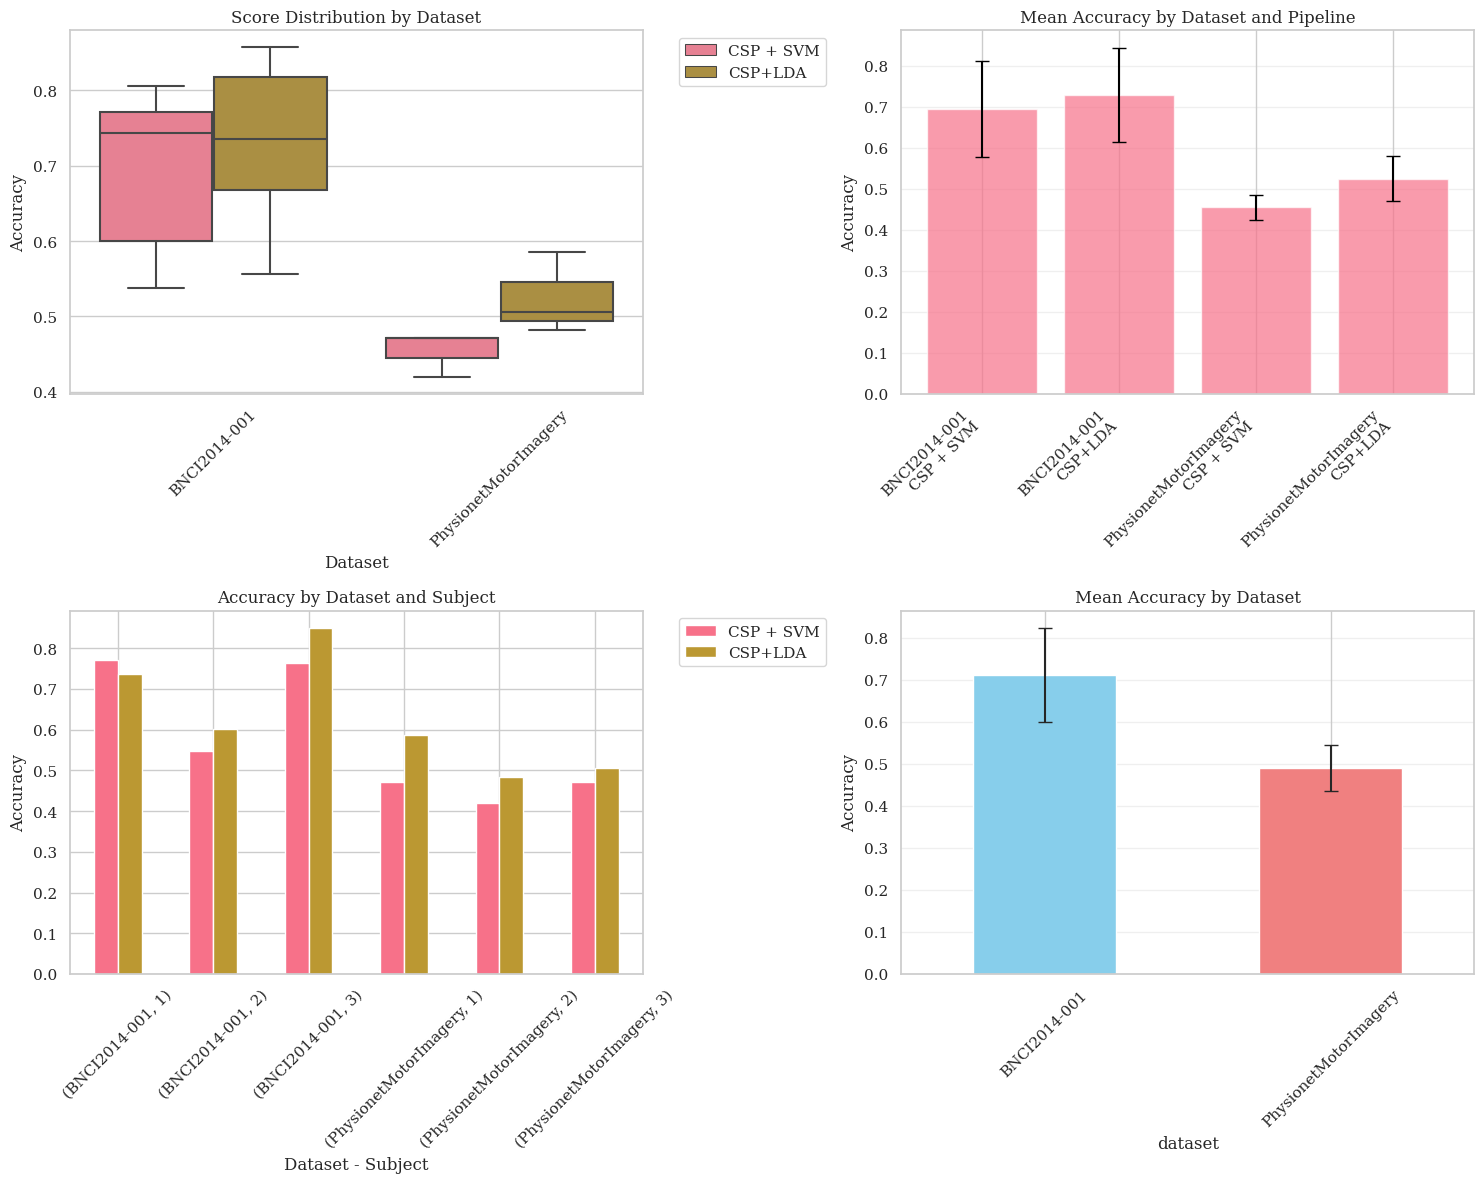

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create visualization
plt.figure(figsize=(15, 12))

# Box plot comparing datasets and pipelines
plt.subplot(2, 2, 1)
sns.boxplot(data=results, x='dataset', y='score', hue='pipeline')
plt.title('Score Distribution by Dataset')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Bar plot with error bars by dataset
plt.subplot(2, 2, 2)
dataset_scores = results.groupby(['dataset', 'pipeline'])['score'].agg(['mean', 'std']).reset_index()
x_pos = range(len(dataset_scores))
bars = plt.bar(x_pos, dataset_scores['mean'], yerr=dataset_scores['std'], capsize=5, alpha=0.7)
plt.title('Mean Accuracy by Dataset and Pipeline')
plt.ylabel('Accuracy')
plt.xticks(x_pos, [f"{row['dataset']}\n{row['pipeline']}" for _, row in dataset_scores.iterrows()], rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Subject-wise comparison across datasets
plt.subplot(2, 2, 3)
pivot_data = results.pivot_table(index=['dataset', 'subject'], columns='pipeline', values='score')
pivot_data.plot(kind='bar', ax=plt.gca())
plt.title('Accuracy by Dataset and Subject')
plt.xlabel('Dataset - Subject')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Dataset comparison
plt.subplot(2, 2, 4)
dataset_means = results.groupby('dataset')['score'].mean()
dataset_stds = results.groupby('dataset')['score'].std()
dataset_means.plot(kind='bar', yerr=dataset_stds, capsize=5, color=['skyblue', 'lightcoral'])
plt.title('Mean Accuracy by Dataset')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


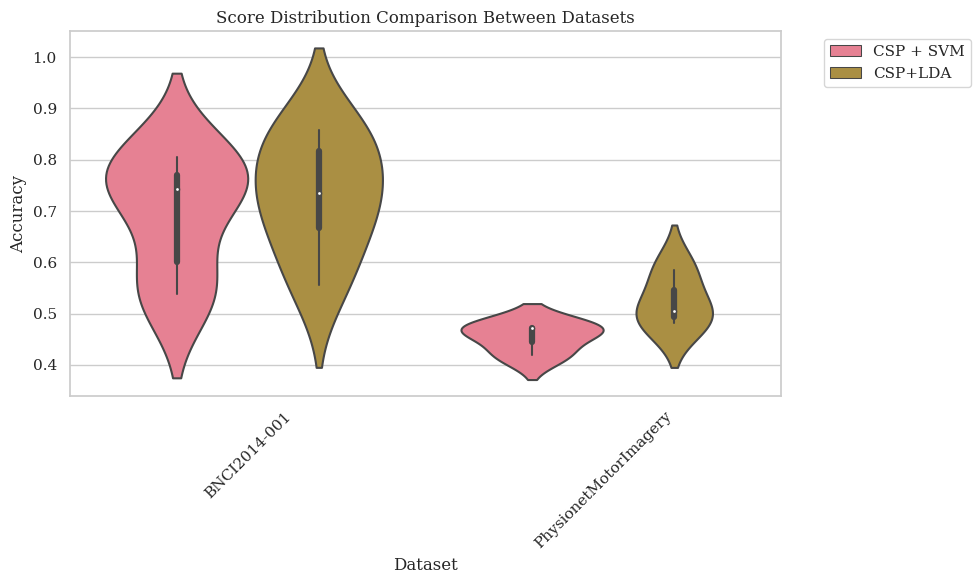

In [38]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=results, x='dataset', y='score', hue='pipeline')
plt.title('Score Distribution Comparison Between Datasets')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()